In [102]:
# Libraries for data processing
import os
import numpy as np
import matplotlib.pyplot as plt

# Libraries for building and training the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Define Directory Structure


In [103]:
# List directory contents
train_dir = '../data/train/'
val_dir = '../data/validation/'
test_dir = '../data/test/'

print("Training data:", os.listdir(train_dir))
print("Validation data:", os.listdir(val_dir))
print("Test data:", os.listdir(test_dir))


Training data: ['dog', 'cat']
Validation data: ['dog', 'cat']
Test data: ['unknown']


### Display Sample Images

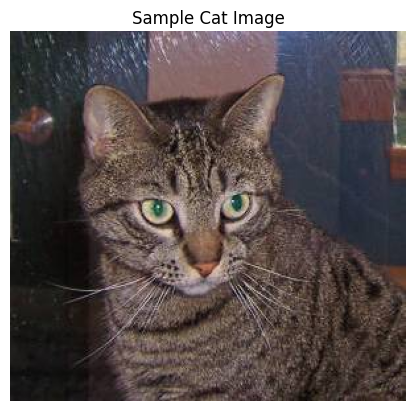

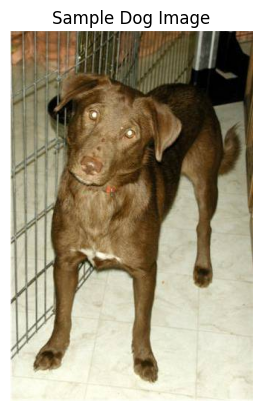

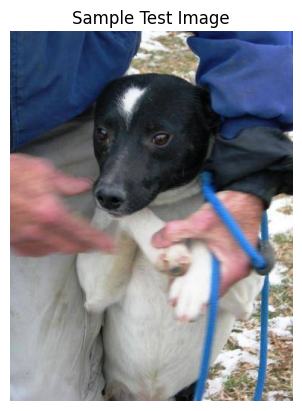

In [104]:
import matplotlib.image as mpimg

# Display a cat image
cat_img_path = os.path.join(train_dir, 'cat', 'cat.1.jpg')
cat_img = mpimg.imread(cat_img_path)
plt.imshow(cat_img)
plt.title("Sample Cat Image")
plt.axis('off')
plt.show()

# Display a dog image
dog_img_path = os.path.join(train_dir, 'dog', 'dog.1.jpg')
dog_img = mpimg.imread(dog_img_path)
plt.imshow(dog_img)
plt.title("Sample Dog Image")
plt.axis('off')
plt.show()

test_img_path = os.path.join(test_dir, 'unknown', '1.jpg')
test_img = mpimg.imread(test_img_path)
plt.imshow(test_img)
plt.title("Sample Test Image")
plt.axis('off')
plt.show()

### Preprocess the Data Using ImageDataGenerator
We preprocess the dataset by normalizing pixel values to the range `[0, 1]`. Additionally:
- **Training data**: Augmented with random transformations (e.g., rotations, flips) to improve generalization.
- **Validation data**: Only normalized (no augmentation) for evaluation purposes.
- **Test data**: Normalized for predictions.


In [105]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation data (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

# Test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)


### Create Data Generators
Data generators are used to load images from the specified directories (`train/`, `validation/`, `test/`). These generators preprocess the images on-the-fly and efficiently feed them to the model during training or prediction.


In [106]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=1,
    class_mode=None,
    shuffle=False
)


Found 202 images belonging to 2 classes.
Found 202 images belonging to 2 classes.
Found 100 images belonging to 1 classes.


### Build the CNN Model
We define a convolutional neural network (CNN) architecture for binary classification:
1. **Convolutional Layers**: Extract features from the images.
2. **MaxPooling Layers**: Downsample feature maps to reduce computational cost.
3. **Fully Connected Layers**: Perform classification with a sigmoid activation function for binary output.


In [107]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (cat vs dog)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [108]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10
)


Epoch 1/10
3/6 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step - accuracy: 0.5113 - loss: 0.9056

6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 941ms/step - accuracy: 0.4639 - loss: 0.9220 - val_accuracy: 0.5104 - val_loss: 0.6916
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 376ms/step - accuracy: 0.4062 - loss: 0.6916 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 784ms/step - accuracy: 0.4950 - loss: 0.6934 - val_accuracy: 0.4896 - val_loss: 0.6924
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - accuracy: 0.4688 - loss: 0.6917 - val_accuracy: 0.4948 - val_loss: 0.6908
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5118 - loss: 0.6913 - val_accuracy: 0.5208 - val_loss: 0.6874
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 378ms/step - accuracy: 0.6250 - loss: 0.6802 - val_accuracy: 0.5000 - val_loss: 0.6899
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 892ms/step - accuracy: 0.5175 - loss: 0.6901 - val_accuracy: 0.5677 - val_loss: 0.6887
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.5312 - loss: 0.6948 - val_accuracy: 0.5312 - val_loss: 0.6908
Epoch

### Evaluate Training performance

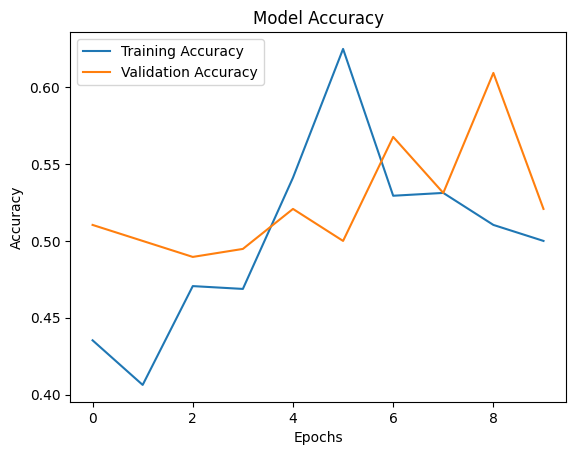

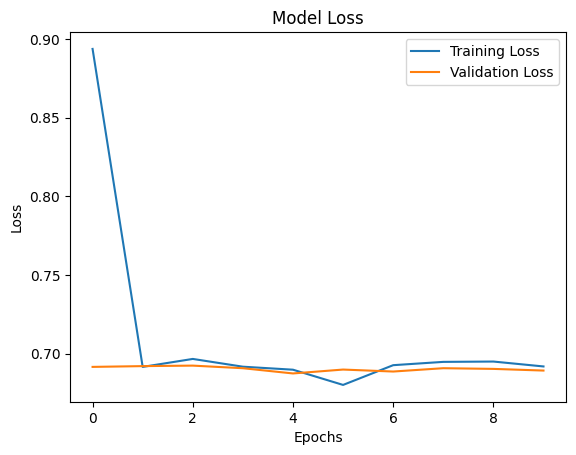

In [109]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


### Preprocess and Predict the Image


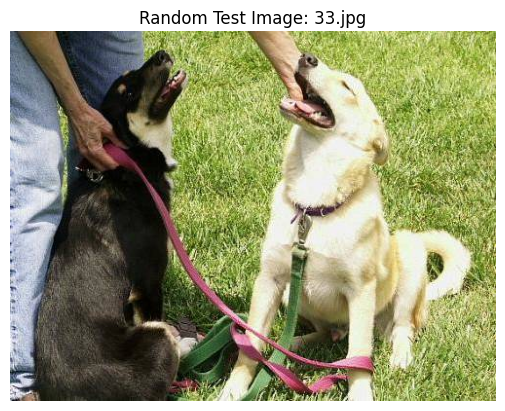

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction: The model predicts this is a dog with confidence 0.53


In [141]:
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

test_dir = '../data/test/unknown/'

# Get a list of all images in the test directory
test_images = os.listdir(test_dir)

# Select a random image
random_image = random.choice(test_images)
random_image_path = os.path.join(test_dir, random_image)

# Display the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Random Test Image: {random_image}")
plt.axis('off')
plt.show()

# Preprocess the image for prediction
img = load_img(random_image_path, target_size=(128, 128))  # Resize to match model input size
img_array = img_to_array(img) / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(img_array)[0][0]
predicted_label = 'dog' if prediction > 0.5 else 'cat'

# Display the prediction
print(f"Prediction: The model predicts this is a {predicted_label} with confidence {prediction:.2f}")